In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [4]:
data = pd.read_csv('IMDB_Movies.csv')
# getting all the data column
pd.set_option('display.max_columns', None)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
# getting the duplicated value and sorting it in descending order
data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [6]:
df = data[['director_name', 'num_critic_for_reviews', 'gross', 'genres', 'actor_1_name', 'movie_title',
          'num_voted_users', 'num_user_for_reviews', 'language', 'budget', 'title_year', 'imdb_score',
          'movie_facebook_likes']]
df.head()
# CREATING PERSONALIZED DATA FRAME WITH ONLY IMPORTANT COLUMNS

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0


In [7]:
df = df[df['gross'].notna()]
df = df[df['budget'].notna()]
df.isnull().sum().sort_values(ascending = False)

actor_1_name              3
language                  3
num_critic_for_reviews    1
director_name             0
gross                     0
genres                    0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [8]:
df['num_critic_for_reviews'].describe()

count    3890.000000
mean      163.234704
std       124.053735
min         1.000000
25%        72.250000
50%       134.000000
75%       221.750000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [10]:
dup = df.duplicated().value_counts()
dup

False    3856
True       35
dtype: int64

Text(0.5, 1.0, 'Number of duplicated value')

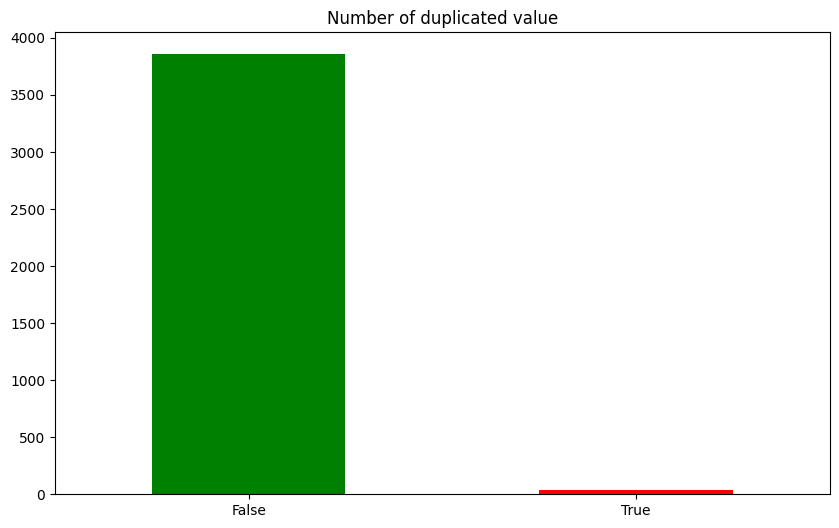

In [11]:
plt.figure(figsize = (10,6))
dup.plot(kind = 'bar', color = ['g', 'r'])
plt.xticks(rotation = 360)
plt.title("Number of duplicated value")

In [14]:
# Getting top 10 values
df['profit'] = df['gross'] - df['budget']
df.head()
top_profitable_movie = df.sort_values(['profit'], axis = 0, ascending = False)
top_profitable_movie.head()
top_10_profit = top_profitable_movie.iloc[:10]
top_10_profit[['movie_title', 'profit']]

,movie_title,profit
0,Avatar,523505847.0
29,Jurassic World,502177271.0
26,Titanic,458672302.0
3024,Star Wars: Episode IV - A New Hope,449935665.0
3080,E.T. the Extra-Terrestrial,424449459.0
794,The Avengers,403279547.0
17,The Avengers,403279547.0
509,The Lion King,377783777.0
240,Star Wars: Episode I - The Phantom Menace,359544677.0
66,The Dark Knight,348316061.0


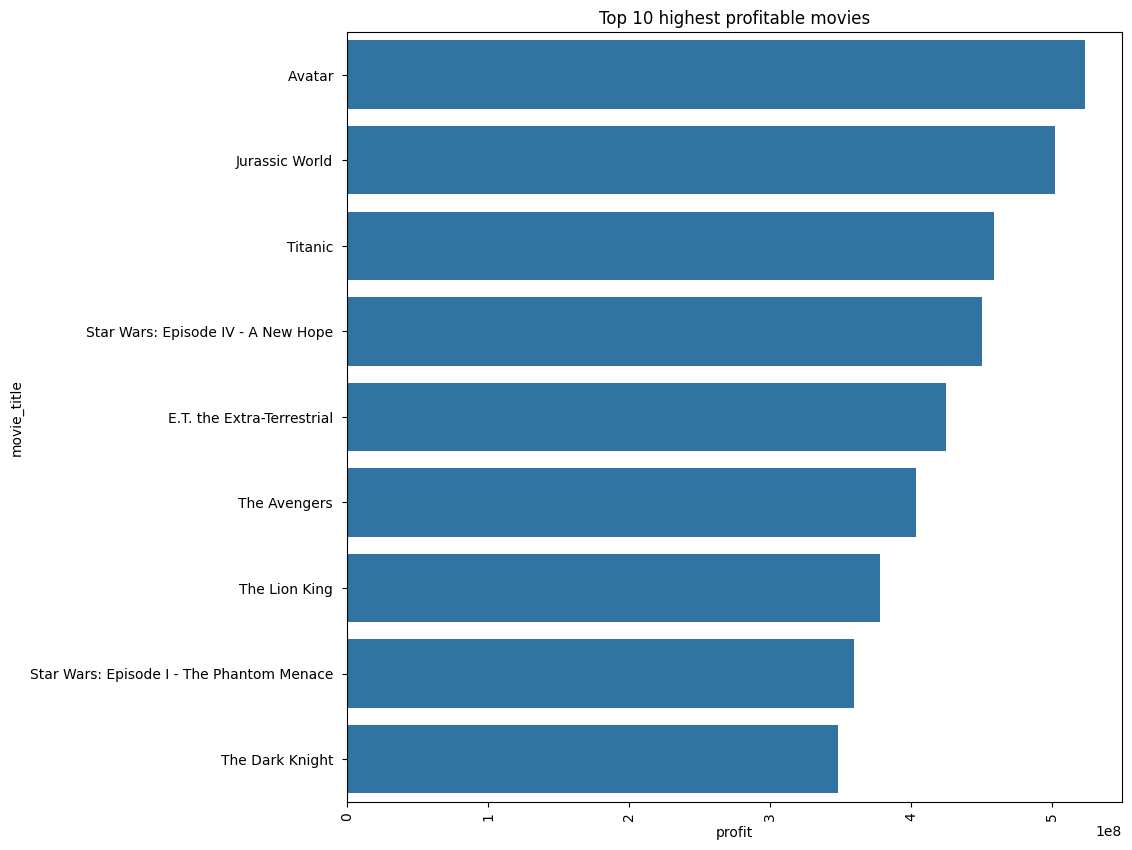

In [15]:
plt.figure(figsize = (10,10))
sns.barplot(data = df, y = top_10_profit['movie_title'], x = top_10_profit['profit'])
plt.xticks(rotation = 90)
plt.title("Top 10 highest profitable movies")
plt.show()

In [16]:
top_10_director = df.groupby(['director_name'])['imdb_score'].mean().reset_index()
top_10_director = top_10_director.sort_values(['imdb_score'], axis = 0, ascending = False)
top_10_director.head(10)

,director_name,imdb_score
216,Charles Chaplin,8.600000
1675,Tony Kaye,8.600000
302,Damien Chazelle,8.500000
1440,Ron Fricke,8.500000
45,Alfred Hitchcock,8.500000
1017,Majid Majidi,8.500000
1498,Sergio Leone,8.433333
260,Christopher Nolan,8.425000
1035,Marius A. Markevicius,8.400000
1467,S.S. Rajamouli,8.400000


Text(0.5, 1.0, 'Top 10 IMDb movie director')

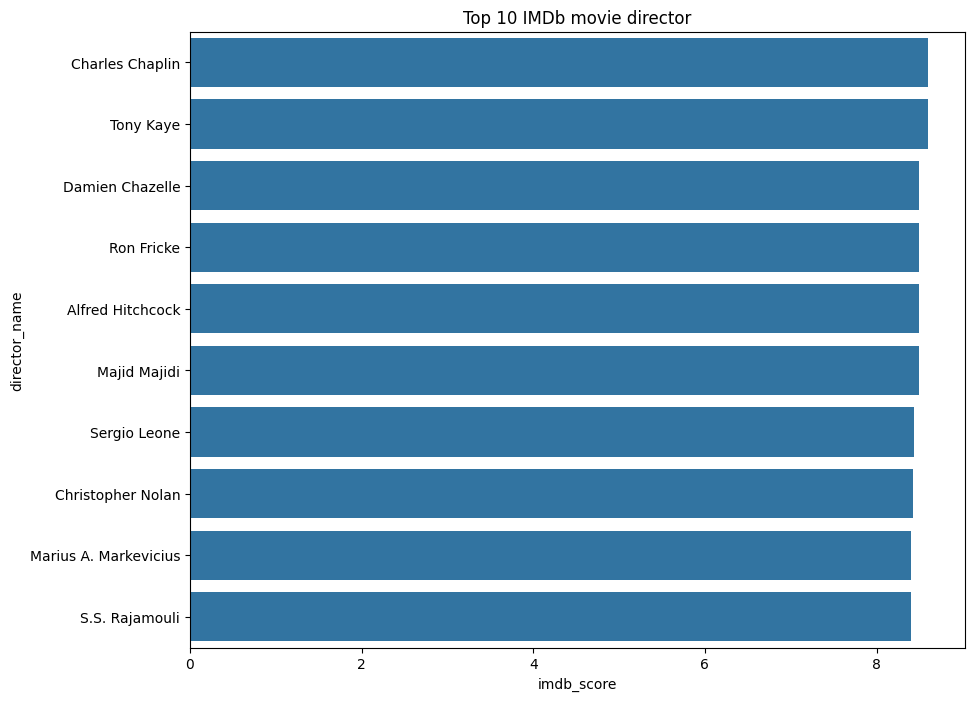

In [17]:
plt.figure(figsize = (10,8))
sns.barplot(data = top_10_director, x = top_10_director['imdb_score'].iloc[:10],
                              y = top_10_director['director_name'].iloc[:10])
plt.title("Top 10 IMDb movie director")